In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks_cwt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv', names=['time', 'signal'])

In [3]:
df.head()

,time,signal
0,0.002,0.0
1,0.020,70.0
2,0.038,27.0
3,0.052,24.0
4,0.072,23.0


In [4]:
df = df.drop(df.index[[0, -1]])
df = df.dropna()

In [5]:
time = df['time']

In [6]:
signal = df['signal']

In [7]:
signal = signal.astype(float, casting='safe')

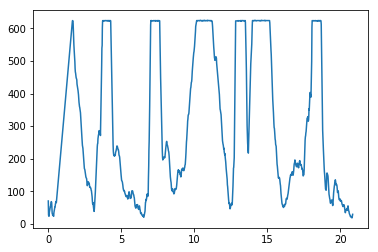

In [21]:
plt.plot(time, signal)

In [8]:
from scipy.signal import lfilter

n = 15
b = [1.0 / n] * n
a = 1

l_signal = lfilter(b, a, signal)

In [9]:
l_indexes = find_peaks_cwt(l_signal, time, noise_perc=10)

In [10]:
l_peak_sigs = [l_signal[index] for index in l_indexes]

In [11]:
l_peak_time = [time[index] for index in l_indexes]

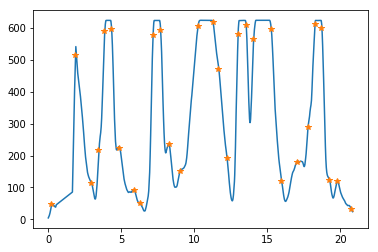

In [12]:
plt.plot(time, l_signal)
plt.plot(l_peak_time, l_peak_sigs, '*')

In [14]:
l_peak_time

[0.23800015449499998,
 1.8540000915500001,
 2.9520001411400001,
 3.4520001411400001,
 3.8540000915499997,
 4.3210000991800008,
 4.8710000514999994,
 5.8870000839199994,
 6.2710001468699987,
 7.1520001888299998,
 7.6720001697500004,
 8.254000186919999,
 9.0020000934600013,
 10.236000061,
 11.256000042,
 11.654000043900002,
 12.220000028599999,
 12.9710001945,
 13.521000146900001,
 14.037000179300001,
 15.236999988599999,
 15.953000068699998,
 17.006000042,
 17.755000114400001,
 18.2380001545,
 18.7039999962,
 19.239000082,
 19.755000114400001,
 20.7210001945]

In [15]:
len(l_peak_time)

29

In [16]:
i = 0
limit = 3
threshold = 400
list_size = len(l_peak_time)

kick_first = False

if l_peak_sigs[i] < threshold:
    kick_first = True

while i < list_size - 1:
    
    if i < list_size - 1 and (l_peak_time[i] + limit > l_peak_time[i+1] or l_peak_sigs[i+1] < threshold):
        l_peak_time.pop(i + 1)
        l_peak_sigs.pop(i + 1)
        list_size -=1
        i -= 1

    i += 1
if kick_first:
    l_peak_time.pop(0)
    l_peak_sigs.pop(0)



In [17]:
len(l_peak_time)

5

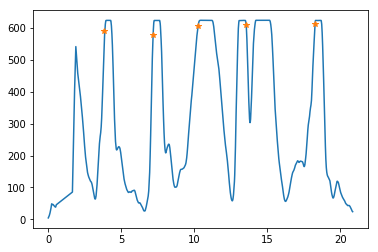

In [18]:
plt.plot(time, l_signal)
plt.plot(l_peak_time, l_peak_sigs, '*')

In [19]:
print("We believe your fetus has {} ± {} kicks".format(len(l_peak_time), 2))

We believe your fetus has 5 ± 2 kicks
